In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [4]:
activity = pd.read_csv(os.path.join('andrew_data2.csv'))
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2051690684,Run,Run,NaN,01.01.2019,15.6,Afternoon Run,65.5,11.425,5.73,...,-116.960523,(GMT-08:00) America/Los_Angeles,0,0,2192263908,2192263908,-28800,1/1/2019,0.43,https://www.strava.com/activities/2051690684
1,2974419038,Run,Hike,NaN,01.01.2020,15.4,Afternoon Run,141.5,8.585,16.49,...,-116.972282,(GMT-08:00) America/Los_Angeles,0,0,3169462081,3169462081,-28800,1/1/2020,3.98,https://www.strava.com/activities/2974419038
2,1432710517,Run,Run,NaN,01.03.2018,7.4,Morning Run,48.7,8.434,5.77,...,-116.960436,(GMT-08:00) America/Los_Angeles,0,0,1545662477,1545662477,-28800,3/1/2018,0.96,https://www.strava.com/activities/1432710517
3,923785050,Run,Run,NaN,01.04.2017,6.8,Morning Run,172.2,32.301,5.33,...,-117.255867,(GMT-08:00) America/Los_Angeles,0,0,1023629735,1023629735,-25200,4/1/2017,0.86,https://www.strava.com/activities/923785050
4,1016023574,Run,Run,NaN,01.06.2017,6.4,Morning Run,82.4,16.159,5.10,...,-116.959949,(GMT-08:00) America/Los_Angeles,0,0,1118724262,1118724262,-25200,6/1/2017,0.83,https://www.strava.com/activities/1016023574


In [5]:
activity[["start_date_local"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   start_date_local  527 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


In [6]:
activity["start_date_local"] = pd.to_datetime(activity["start_date_local"])
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2051690684,Run,Run,NaN,2019-01-01,15.6,Afternoon Run,65.5,11.425,5.73,...,-116.960523,(GMT-08:00) America/Los_Angeles,0,0,2192263908,2192263908,-28800,1/1/2019,0.43,https://www.strava.com/activities/2051690684
1,2974419038,Run,Hike,NaN,2020-01-01,15.4,Afternoon Run,141.5,8.585,16.49,...,-116.972282,(GMT-08:00) America/Los_Angeles,0,0,3169462081,3169462081,-28800,1/1/2020,3.98,https://www.strava.com/activities/2974419038
2,1432710517,Run,Run,NaN,2018-01-03,7.4,Morning Run,48.7,8.434,5.77,...,-116.960436,(GMT-08:00) America/Los_Angeles,0,0,1545662477,1545662477,-28800,3/1/2018,0.96,https://www.strava.com/activities/1432710517
3,923785050,Run,Run,NaN,2017-01-04,6.8,Morning Run,172.2,32.301,5.33,...,-117.255867,(GMT-08:00) America/Los_Angeles,0,0,1023629735,1023629735,-25200,4/1/2017,0.86,https://www.strava.com/activities/923785050
4,1016023574,Run,Run,NaN,2017-01-06,6.4,Morning Run,82.4,16.159,5.10,...,-116.959949,(GMT-08:00) America/Los_Angeles,0,0,1118724262,1118724262,-25200,6/1/2017,0.83,https://www.strava.com/activities/1016023574


In [7]:
activity_clean = activity[["type", "type_m", "start_date_local", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
activity_clean.head()

,type,type_m,start_date_local,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Run,Run,2019-01-01,15.6,65.5,NaN,NaN,83.6
1,Run,Hike,2020-01-01,15.4,141.5,95.0,124.0,53.2
2,Run,Run,2018-01-03,7.4,48.7,151.7,186.0,84.2
3,Run,Run,2017-01-04,6.8,172.2,156.5,193.0,84.4
4,Run,Run,2017-01-06,6.4,82.4,158.2,183.0,86.1


In [8]:
data2 = activity_clean.dropna()
data2 = data2[(data2['type'] != 'Elliptical')] 
data2.head()

,type,type_m,start_date_local,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
1,Run,Hike,2020-01-01,15.4,141.5,95.0,124.0,53.2
2,Run,Run,2018-01-03,7.4,48.7,151.7,186.0,84.2
3,Run,Run,2017-01-04,6.8,172.2,156.5,193.0,84.4
4,Run,Run,2017-01-06,6.4,82.4,158.2,183.0,86.1
5,Run,Run,2019-01-06,8.1,20.1,141.4,169.0,85.8


In [9]:
train_data = data2[(data2['start_date_local'] < '2019-12-03')] 
train_data.shape
train_data["type"].value_counts()

Run    305
Name: type, dtype: int64

In [10]:
train_data["type_m"].value_counts()

Run     281
Hike     24
Name: type_m, dtype: int64

In [11]:
test_data = data2[(data2['start_date_local'] >= '2019-12-03')] 
test_data["type"].value_counts()

Run    61
Name: type, dtype: int64

In [12]:
test_data["type_m"].value_counts()

Run     46
Hike    15
Name: type_m, dtype: int64

In [13]:
train_clean = train_data[["type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
train_clean.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
2,Run,7.4,48.7,151.7,186.0,84.2
3,Run,6.8,172.2,156.5,193.0,84.4
4,Run,6.4,82.4,158.2,183.0,86.1
5,Run,8.1,20.1,141.4,169.0,85.8
6,Run,7.3,112.4,157.7,198.0,85.3


In [14]:
test_clean = test_data[["type", "type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
test_clean.head()

,type,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
1,Run,Hike,15.4,141.5,95.0,124.0,53.2
12,Run,Run,7.6,50.7,152.2,165.0,85.5
31,Run,Run,18.5,27.5,147.3,164.0,88.6
43,Run,Run,8.2,48.1,136.1,155.0,86.2
47,Run,Run,18.2,46.9,153.1,169.0,84.3


In [15]:
y = train_clean["type_m"]
y2 = test_clean["type"]
y3 = test_clean["type_m"]
target_names = ["Hike", "Run"]

In [16]:
X = train_clean.drop("type_m", axis=1)
X2 = test_clean.drop("type", axis=1)
X2 = X2.drop("type_m", axis=1)
X.head()

,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
2,7.4,48.7,151.7,186.0,84.2
3,6.8,172.2,156.5,193.0,84.4
4,6.4,82.4,158.2,183.0,86.1
5,8.1,20.1,141.4,169.0,85.8
6,7.3,112.4,157.7,198.0,85.3


In [17]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)

In [18]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X)
X2_test_scaled = X_scaler.transform(X2)

In [19]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
print('Train Acc: %.3f' % model.score(X_train_scaled, y))

Train Acc: 0.980


In [33]:
print('Test Acc: %.3f' % model.score(X2_test_scaled, y3))

Test Acc: 0.984


In [22]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X2_test_scaled)
print(classification_report(y2, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

        Hike       0.00      0.00      0.00         0
         Run       1.00      0.77      0.87        61

    accuracy                           0.77        61
   macro avg       0.50      0.39      0.44        61
weighted avg       1.00      0.77      0.87        61



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y2,predictions)
cm

array([[ 0,  0],
       [14, 47]], dtype=int64)

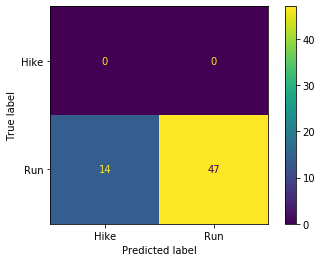

In [24]:
plot_confusion_matrix(model,X2_test_scaled,y2)

In [30]:
predictions2 = model.predict(X2_test_scaled)
print(classification_report(y3, predictions2,
                            target_names=target_names))


              precision    recall  f1-score   support

        Hike       1.00      0.93      0.97        15
         Run       0.98      1.00      0.99        46

    accuracy                           0.98        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.98      0.98      0.98        61



In [27]:
prediction_df = pd.DataFrame({"Prediction": predictions2, "Incorrectly Labeled": y2, "Correctly Labeled": y3}).reset_index(drop=True)
prediction_df.head(5)
prediction_df.to_excel('andrew_predictions2.xlsx', engine='xlsxwriter')  

In [28]:
cm2 = confusion_matrix(y3,predictions2)
cm2

array([[14,  1],
       [ 0, 46]], dtype=int64)

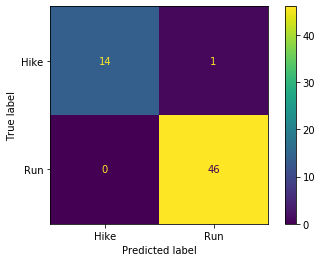

In [29]:
plot_confusion_matrix(model,X2_test_scaled,y3)